# Networkx 

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Exportación

In [3]:
df_productos_ex = pd.read_csv('./relacion_exportacion_productos.csv')

In [4]:
relacion_productos = df_productos_ex.values

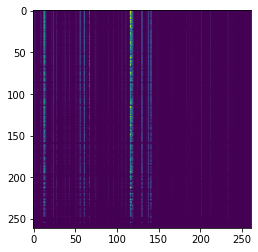

In [5]:
plt.imshow(relacion_productos)

In [6]:
df = pd.read_csv('./datos_productos.csv')

In [7]:
countries = df['Partner'].unique()
products = df['Commodity'].unique()

In [8]:
products[260]

'Albuminoidal substances modified starchesglues enzymes'

In [54]:
num_edges = []
num_nodes = []
g_degree = []
avg_shortest_path_length = []
avg_clustering = []
avg_degree_connectivity = []

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.average_degree_connectivity.html

Trimming

In [60]:
for t_i in range(5,100,5):
    th = np.percentile(relacion_productos,t_i)
    g_productos = nx.DiGraph()    
    already_product = []    
    for i in range(relacion_productos.shape[0]):
        for j in range(len(relacion_productos[i])):
            product_a = products[i]
            product_b = products[j]
            if(i!=j and relacion_productos[i][j]>=th):
                if product_a not in already_product:
                    already_product.append(product_a)
                    g_productos.add_node(product_a)
                if product_b not in already_product:
                    already_product.append(product_b)
                    g_productos.add_node(product_b)                
                g_productos.add_edge(
                    product_a,
                    product_b,
                    weight=relacion_productos[i][j]
                )
    # metrics
    num_edges.append(len(g_productos.edges))
    num_nodes.append(len(g_productos.nodes))
    gd = dict(g_productos.degree())    
    g_degree.append(np.mean(list(gd.values())))
    avg_clustering.append(nx.average_clustering(g_productos,nodes=None,weight='weight'))
    avg_c = nx.average_degree_connectivity(g_productos,weight='weight')    
    avg_degree_connectivity.append(np.mean(list(avg_c.values())))
    avg_shortest_path_length.append(nx.average_shortest_path_length(g_productos,weight='weight'))

In [83]:
x = list(range(5,100,5))

Number of edges

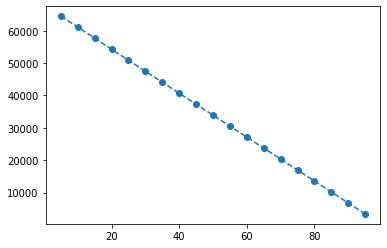

In [104]:
plt.plot(x,num_edges,linestyle='--',marker='o')

Number of nodes

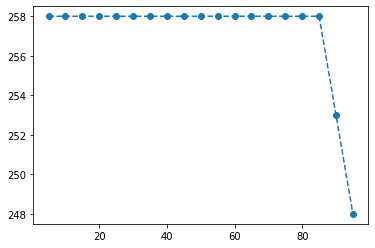

In [102]:
plt.plot(x,num_nodes,linestyle='--',marker='o')

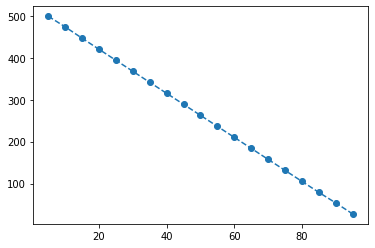

In [101]:
plt.plot(x,g_degree,linestyle='--',marker='o')

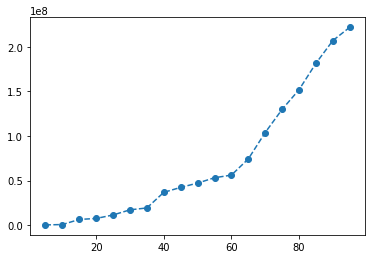

In [100]:
plt.plot(x,avg_shortest_path_length,linestyle='--',marker='o')

Clustering coefficient

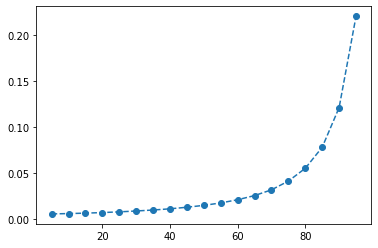

In [99]:
plt.plot(x,avg_clustering,linestyle='--',marker='o')

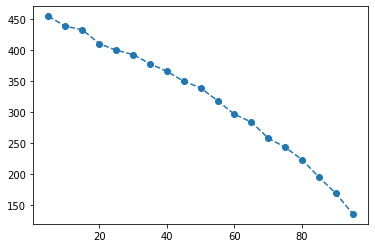

In [98]:
plt.plot(x,avg_degree_connectivity,linestyle='--',marker='o')

In [11]:
th = np.percentile(relacion_productos,90)

In [12]:
for i in range(relacion_productos.shape[0]):
    # get 20% higher edges
    for j in range(len(relacion_productos[i])):
        product_a = products[i]
        product_b = products[j]
        if(i!=j and relacion_productos[i][j]>=th):
            if product_a not in already_product:
                already_product.append(product_a)
                g_productos.add_node(product_a)
            if product_b not in already_product:
                already_product.append(product_b)
                g_productos.add_node(product_b)                
            g_productos.add_edge(
                product_a,
                product_b,
                weight=relacion_productos[i][j]
            )
            

In [13]:
len(g_productos.edges)

6776

In [14]:
len(g_productos.nodes)

253

In [15]:
261*261*0.01

681.21

In [16]:
w_dict = nx.get_edge_attributes(g_productos,'weight')

In [17]:
limite = relacion_productos.max()

Degree de la red, conexiones promedio por nodo

[]

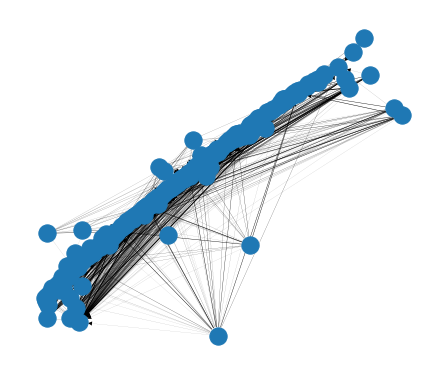

In [18]:
pos=nx.spring_layout(g_productos,weight='weight')
plt.figure(figsize=(6,5))
width_list = [w_dict[edge]/limite for edge in g_productos.edges]
nx.draw(g_productos, pos, width=width_list)#, with_labels=True)
plt.plot()

In [19]:
nx.average_shortest_path_length(g_productos,weight='weight')

207037308.1161616

0.4717357591088707

In [56]:
gd = dict(g_productos.degree())
np.array([gd[gi] for gi in gd]).mean()


5.861471861471862

5.861471861471862

In [51]:
avg_c = nx.average_degree_connectivity(g_productos,weight='weight')

In [52]:
avg_c.keys()

dict_keys([170, 182, 102, 32, 206, 3, 5, 2, 1, 4])

In [53]:
np.mean(list(avg_c.keys()))

70.7

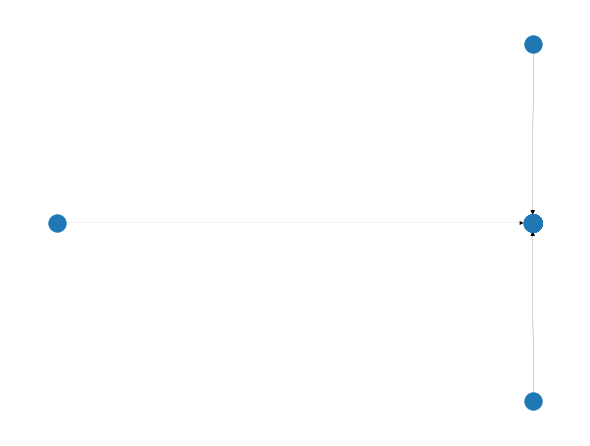

In [23]:
pos=nx.spectral_layout(g_productos,weight='weight')
plt.figure(figsize=(8,6))
width_list = [w_dict[edge]/limite for edge in g_productos.edges]
nx.draw(g_productos, pos, width=width_list)#, with_labels=True)
plt.show()

## Importación

In [2]:
df_productos_im = pd.read_csv('./relacion_importacion_productos.csv')

In [5]:
relacion_productos_im = df_productos_im.values

In [9]:
num_edges = []
num_nodes = []
g_degree = []
avg_shortest_path_length = []
avg_clustering = []
avg_degree_connectivity = []

In [10]:
for t_i in range(5,100,5):
    th = np.percentile(relacion_productos_im,t_i)
    g_productos = nx.DiGraph()    
    already_product = []    
    for i in range(relacion_productos_im.shape[0]):
        for j in range(len(relacion_productos_im[i])):
            product_a = products[i]
            product_b = products[j]
            if(i!=j and relacion_productos_im[i][j]>=th):
                if product_a not in already_product:
                    already_product.append(product_a)
                    g_productos.add_node(product_a)
                if product_b not in already_product:
                    already_product.append(product_b)
                    g_productos.add_node(product_b)                
                g_productos.add_edge(
                    product_a,
                    product_b,
                    weight=relacion_productos_im[i][j]
                )
    # metrics
    num_edges.append(len(g_productos.edges))
    num_nodes.append(len(g_productos.nodes))
    gd = dict(g_productos.degree())    
    g_degree.append(np.mean(list(gd.values())))
    avg_clustering.append(nx.average_clustering(g_productos,nodes=None,weight='weight'))
    avg_c = nx.average_degree_connectivity(g_productos,weight='weight')    
    avg_degree_connectivity.append(np.mean(list(avg_c.values())))
    avg_shortest_path_length.append(nx.average_shortest_path_length(g_productos,weight='weight'))

In [11]:
x = list(range(5,100,5))

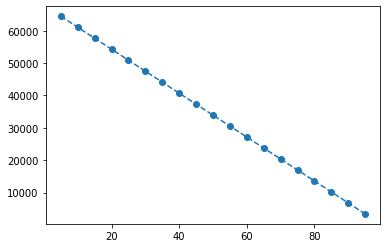

In [12]:
plt.plot(x,num_edges,linestyle='--',marker='o')

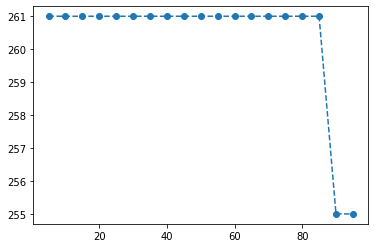

In [13]:
plt.plot(x,num_nodes,linestyle='--',marker='o')

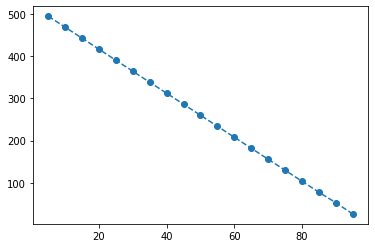

In [14]:
plt.plot(x,g_degree,linestyle='--',marker='o')

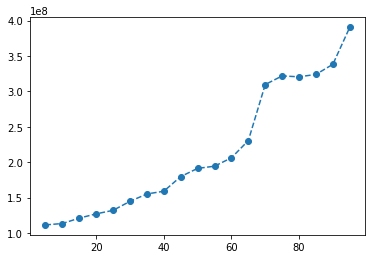

In [15]:
plt.plot(x,avg_shortest_path_length,linestyle='--',marker='o')

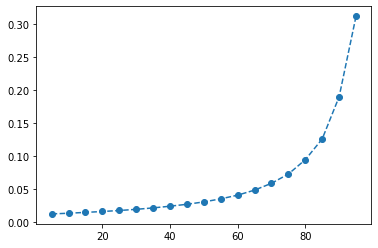

In [16]:
plt.plot(x,avg_clustering,linestyle='--',marker='o')

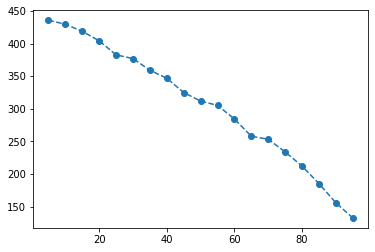

In [17]:
plt.plot(x,avg_degree_connectivity,linestyle='--',marker='o')

In [4]:
th = np.percentile(relacion_productos_im,99)

In [27]:
th

6896344468.200011

In [28]:
g_productos = nx.DiGraph()

In [29]:
already_product = []

In [30]:
for i in range(relacion_productos_im.shape[0]):
    # get 20% higher edges
    for j in range(len(relacion_productos_im[i])):
        product_a = products[i]
        product_b = products[j]
        if(i!=j and relacion_productos_im[i][j]>=th):
            if product_a not in already_product:
                already_product.append(product_a)
                g_productos.add_node(product_a)
            if product_b not in already_product:
                already_product.append(product_b)
                g_productos.add_node(product_b)                
            g_productos.add_edge(
                product_a,
                product_b,
                weight=relacion_productos_im[i][j]
            )

In [31]:
len(g_productos.edges)

677

In [32]:
len(g_productos.nodes)

231

In [33]:
w_dict = nx.get_edge_attributes(g_productos,'weight')

In [34]:
limite = relacion_productos_im.max()

[]

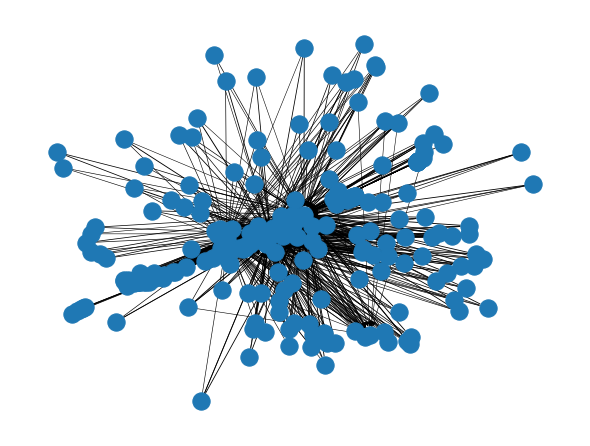

In [35]:
pos=nx.spring_layout(g_productos,weight='weight')
plt.figure(figsize=(8,6))
width_list = [w_dict[edge]/limite for edge in g_productos.edges]
nx.draw(g_productos, pos, width=width_list)#, with_labels=True)
plt.plot()

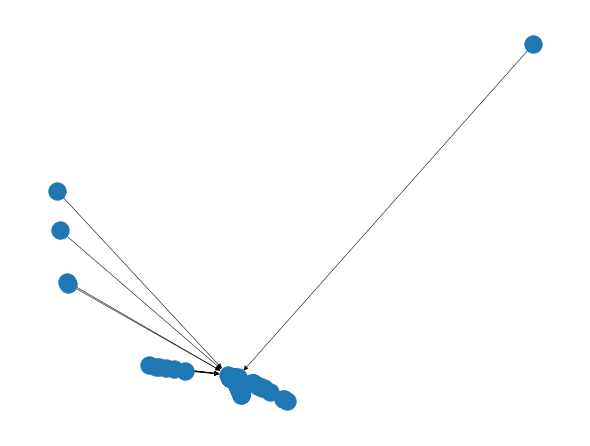

In [36]:
pos=nx.spectral_layout(g_productos,weight='weight')
plt.figure(figsize=(8,6))
width_list = [w_dict[edge]/limite for edge in g_productos.edges]
nx.draw(g_productos, pos, width=width_list)#, with_labels=True)
plt.show()